In [25]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca

from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv("data/gesell.csv", sep=',')
df

,age,score
0,15,95
1,26,71
2,10,83
3,9,91
4,15,102
5,20,87
6,18,93
7,11,100
8,8,104
9,20,94


In [3]:
X = df['age'].values.astype('d')
Y = df['score'].values.astype('d')

In [26]:
XY0 = np.c_[X, Y]
XY0 = scale(XY0)
N = len(XY0)
print(XY0[:10])

[[ 0.07982524  0.09768142]
 [ 1.4982583  -1.66058412]
 [-0.56491706 -0.78145135]
 [-0.69386552 -0.19536284]
 [ 0.07982524  0.61050887]
 [ 0.72456754 -0.48840709]
 [ 0.46667062 -0.04884071]
 [-0.4359686   0.46398674]
 [-0.82281398  0.757031  ]
 [ 0.72456754  0.02442035]]


[ 0.00000000e+00 -3.70074342e-16]


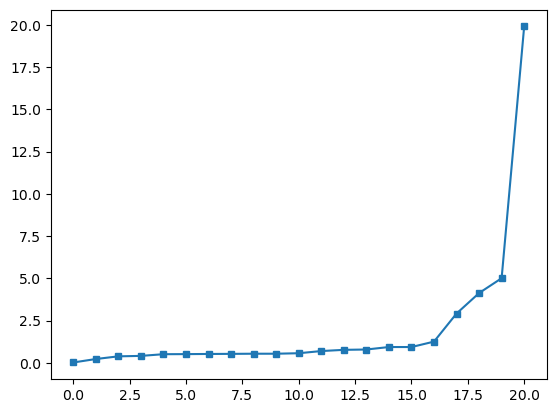

In [27]:
c0 = pca.find_center(XY0)
print(c0)
plt.plot(sorted(pca.distance_center(XY0, c0)), marker='s', markersize=4)
plt.show()

[-0.20877371  0.39770288]


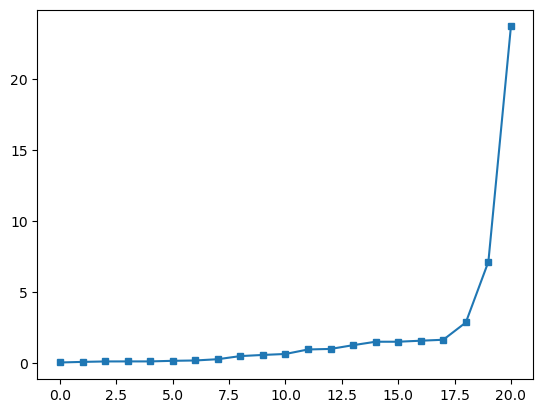

In [74]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.001), alpha=(N-2)/N)
c = pca.find_rob_center(XY0, wma)
print(c)
plt.plot(sorted(pca.distance_center(XY0, c)), marker='s', markersize=4)
plt.show()

In [75]:
XY1 = XY0 - c
XY1_0 = XY0 - c0

In [76]:
a1_0, L1_0 = pca.find_pc(XY1_0)
a11_0 = a1_0 * 10
print(L1_0, a1_0)

1.640289982283794 [ 0.70710679 -0.70710677]


In [77]:
a1, L1 = pca.find_rob_pc(XY1, wma)
a11 = a1 * 10
print(L1, a1)

0.5227789119977031 [-0.16528938  0.98624511]


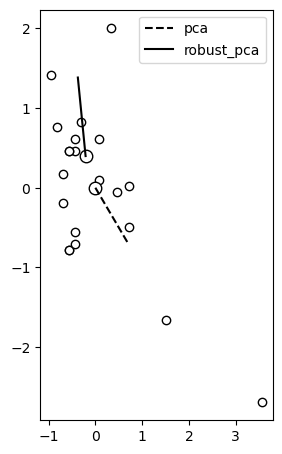

In [78]:
aa = 16/9
plt.figure(figsize=(3,3*aa))
plt.scatter(XY0[:,0], XY0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=81, c='w', edgecolors='k')
plt.scatter([c[0]], [c[1]], s=81, c='w', edgecolors='k')
plt.plot([c0[0], c0[0]+a1_0[0]], [c0[1], c0[1]+a1_0[1]], c='k', linestyle='--', label='pca')
plt.plot([c[0], c[0]+a1[0]], [c[1], c[1]+a1[1]], c='k', label='robust_pca')
plt.legend()
plt.show()

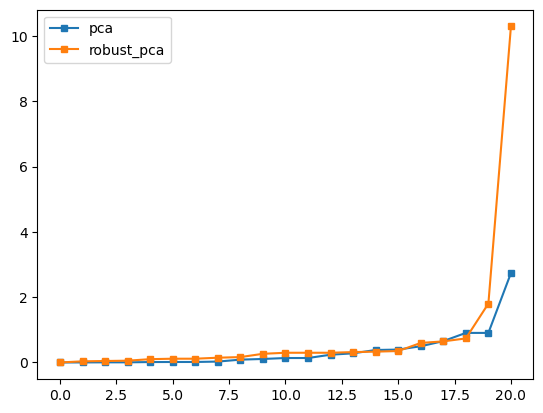

In [79]:
plt.plot(sorted(pca.distance_line(XY1_0, a1_0)), marker='s', markersize=4, label='pca')
plt.plot(sorted(pca.distance_line(XY1, a1)), marker='s', markersize=4, label='robust_pca')
plt.legend()
plt.show()

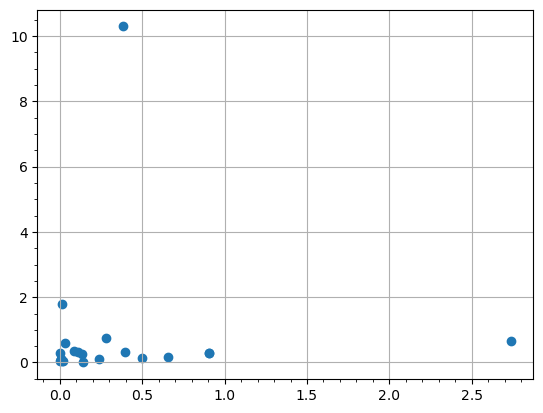

In [80]:
plt.scatter(pca.distance_line(XY1_0, a1_0), pca.distance_line(XY1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [81]:
XY2 = pca.project(XY1, a1)
XY2_0 = pca.project(XY1_0, a1_0)

In [82]:
a2_0, L2_0 = pca.find_pc(XY2_0)
print(L2_0, a2_0)

0.359710017716206 [0.70710677 0.70710679]


In [83]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=(N-3)/N)
a2, L2 = pca.find_rob_pc(XY2, wma)
print(L2, a2)

0.7648733852045249 [0.98624511 0.16528938]


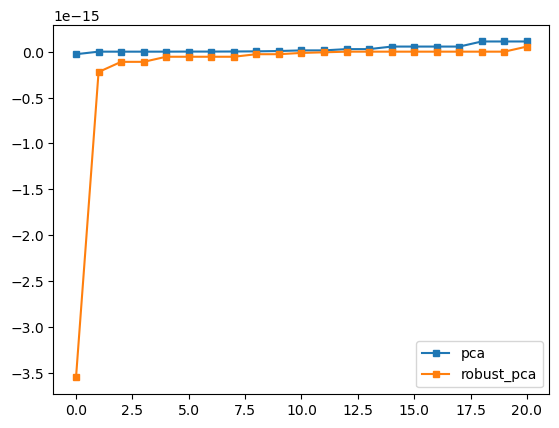

In [84]:
plt.plot(sorted(pca.distance_line(XY2_0, a2_0)), marker='s', markersize=4, label='pca')
plt.plot(sorted(pca.distance_line(XY2, a2)), marker='s', markersize=4, label='robust_pca')
plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


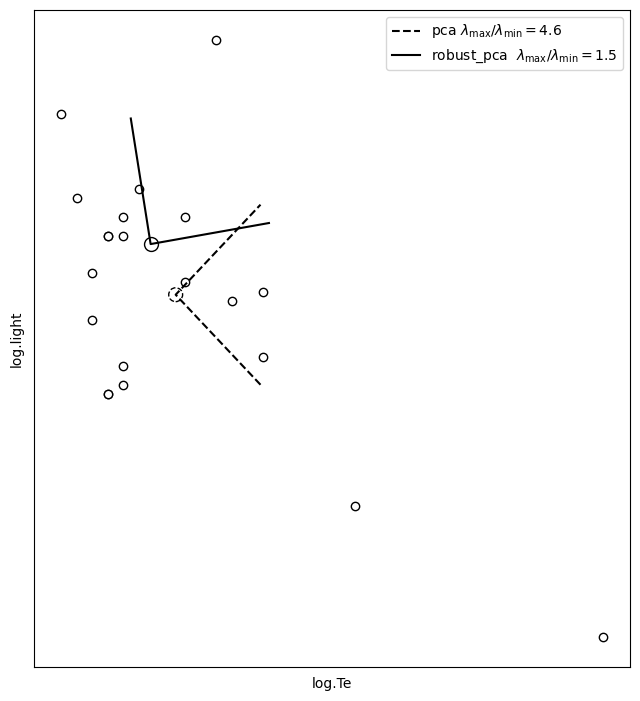

In [85]:
aa = 16/9
plt.figure(figsize=(6.5,4*aa))
plt.scatter(XY0[:,0], XY0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=100, c='w', edgecolors='k', linestyle='--')
plt.scatter([c[0]], [c[1]], s=100, c='w', edgecolors='k')
plt.plot([c0[0]+a1_0[0], c0[0], c0[0]+a2_0[0]], [c0[1]+a1_0[1], c0[1], c0[1]+a2_0[1]], 
         c='k', linestyle='--', label=r'pca $\lambda_\max/\lambda_\min=%.1f$' % (max(L2_0,L1_0)/min(L2_0,L1_0)))
plt.plot([c[0]+a1[0], c[0], c[0]+a2[0]], [c[1]+a1[1], c[1], c[1]+a2[1]], 
         c='k', label='robust_pca  $\lambda_\max/\lambda_\min=%.1f$' % (max(L2,L1)/min(L2,L1)))
plt.legend()
plt.xticks([])
plt.yticks([])
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.tight_layout()
plt.savefig('fig/robust_pca_starsCYG.eps')
plt.show()

In [59]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [60]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=(N-6)/N)
S = robust_scatter_matrix(XY1, wma)
print(S)

[[ 1.14251404 -0.01476514]
 [-0.01476514  0.87545358]]


In [61]:
L, A = np.linalg.eig(S)
print(A)
np.dot(A[0], A[1])

[[ 0.99848436  0.05503613]
 [-0.05503613  0.99848436]]


6.245004513516506e-17

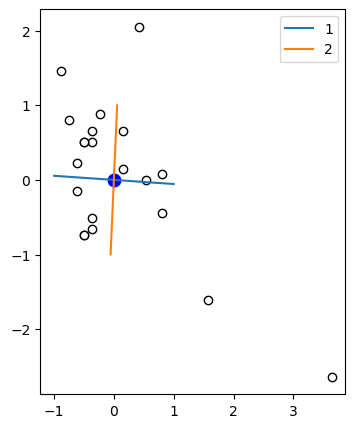

In [62]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(XY1[:,0], XY1[:,1], c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-A[0,0], 0, A[0,0]], [-A[1,0], 0, A[1,0]], label='1')
plt.plot([-A[0,1], 0, A[0,1]], [-A[1,1], 0, A[1,1]], label='2')
plt.legend()
plt.show()

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca_sk = PCA()
pca_sk.fit(XY0)
AA = pca_sk.components_
print(AA)
pca_sk.mean_

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


array([ 0.00000000e+00, -3.70074342e-16])

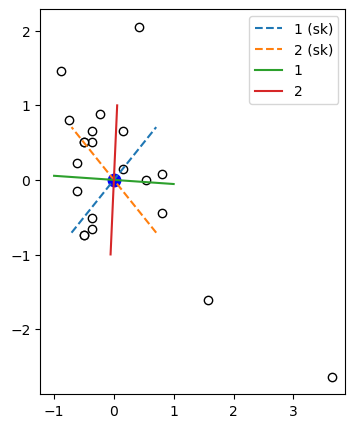

In [65]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(XY1[:,0], XY1[:,1], c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-AA[0,0], 0, AA[0,0]], [-AA[1,0], 0, AA[1,0]], linestyle='--', label='1 (sk)')
plt.plot([-AA[0,1], 0, AA[0,1]], [-AA[1,1], 0, AA[1,1]], linestyle='--', label='2 (sk)')
plt.plot([-A[0,0], 0, A[0,0]], [-A[1,0], 0, A[1,0]], label='1')
plt.plot([-A[0,1], 0, A[0,1]], [-A[1,1], 0, A[1,1]], label='2')
plt.legend()
plt.show()